In [59]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [38]:
# Function to compute the Fourier coefficients c_k for complex exponentials
def compute_fourier_coefficients_complex(f, L, N=10):

    assert int(N)%2 == 0, "N must be even!"
    Nhalf = int(N/2.0)

    c_k = []

    for k in range(-Nhalf, Nhalf):
        # Separate integration of real and imaginary parts
        real_part = quad(lambda x: f(x) * np.cos(k * np.pi * x / L), -L, L)[0]
        imag_part = quad(lambda x: f(x) * np.sin(k * np.pi * x / L), -L, L)[0]
        c_k_val = (1 / (2 * L)) * (real_part - 1j * imag_part)  # Combine real and imaginary parts
        c_k.append(c_k_val)

    return c_k

In [39]:
# Define the function f(x)
def f(x):
    return np.sin(x)  # Example function


In [40]:
compute_fourier_coefficients_complex(f, 1, N=4)

[-0.137404770188995j, 0.2980470091492216j, 0j, -0.2980470091492216j]

In [41]:
# # Function to create a partial sum approximation
# def partial_sum_fourier(c_k, L, n_terms):
#     def approximation(x):
#         # Initialize the sum
#         sum_result = 0
        
#         # Compute the sum over the Fourier coefficients
#         for k, c in enumerate(c_k):
#             # k ranges from -n_terms to n_terms, so adjust the index
#             k_adjusted = k - n_terms
#             sum_result += c * np.exp(1j * k_adjusted * np.pi * x / L)
        
#         return np.real(sum_result)  # Take the real part of the sum

#     return approximation

def partial_sum_fourier(c_k, L):

    N = len(c_k)
    Nhalf = int(N/2.0)

    def approximation(x):
        x = np.asarray(x)  # Ensure x is treated as a NumPy array
        sum_result = np.zeros_like(x, dtype=np.complex128)  # Initialize the sum as a complex array

        # Compute the sum over the Fourier coefficients
        for k, c in enumerate(c_k):
            # k ranges from -n_terms to n_terms, so adjust the index
            k_adjusted = k - Nhalf
            sum_result += c * np.exp(1j * k_adjusted * np.pi * x / L)

        return np.real(sum_result)  # Take the real part of the sum

    return approximation

In [51]:
N = 40
L = 1
c_k = compute_fourier_coefficients_complex(f, L, N)


In [52]:
# Create the partial sum function
partial_sum_fn = partial_sum_fourier(c_k, L)

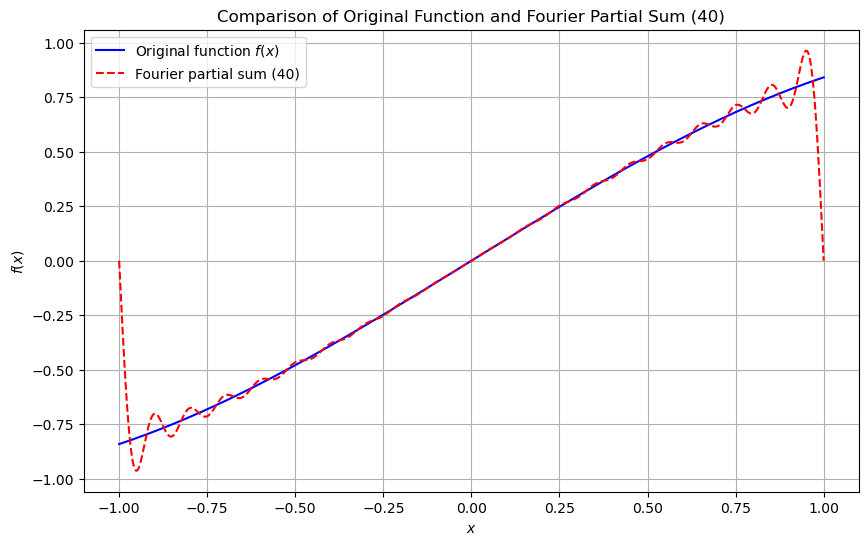

In [53]:
# Generate points in the interval [-L, L] for plotting
x_values = np.linspace(-L, L, 1000)
f_values = [f(x) for x in x_values]
partial_sum_values = partial_sum_fn(x_values)

# Plot the original function and its Fourier approximation
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label='Original function $f(x)$', color='blue')
plt.plot(x_values, partial_sum_values, label=f'Fourier partial sum ({N})', color='red', linestyle='--')
plt.title(f'Comparison of Original Function and Fourier Partial Sum ({N})')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Function to compute the L2 norm of the error
def compute_L2_error(f, approx_fn, L):
    # Define the integrand for the error |f(x) - S_n(x)|^2
    integrand = lambda x: (f(x) - approx_fn(x))**2
    # Compute the integral and take the square root
    error, _ = quad(integrand, -L, L)
    return np.sqrt(error)

In [65]:
# Set the range of n_terms to evaluate
Ns = [2*i for i in range(1,20)]
Linf_errors = []

# Compute L2 error for each n_terms
for N in Ns:
    c_k = compute_fourier_coefficients_complex(f, L, N)
    sr.fourier_partial_sum_projection(f, )
    partial_sum_fn = partial_sum_fourier(c_k, L)
    L2_error = compute_L2_error(f, partial_sum_fn, L)
    L2_errors.append(L2_error)

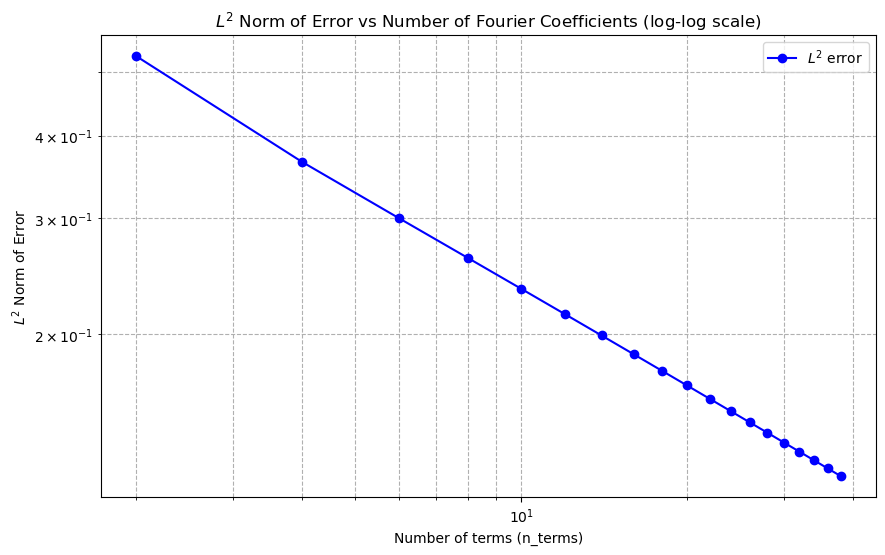

In [58]:
# Plot the L2 error against n_terms on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(Ns, L2_errors, marker='o', color='blue', label='$L^2$ error')
plt.title('$L^2$ Norm of Error vs Number of Fourier Coefficients (log-log scale)')
plt.xlabel('Number of terms (n_terms)')
plt.ylabel('$L^2$ Norm of Error')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [63]:
len(L2_errors)

38

In [64]:
len(Ns)

19

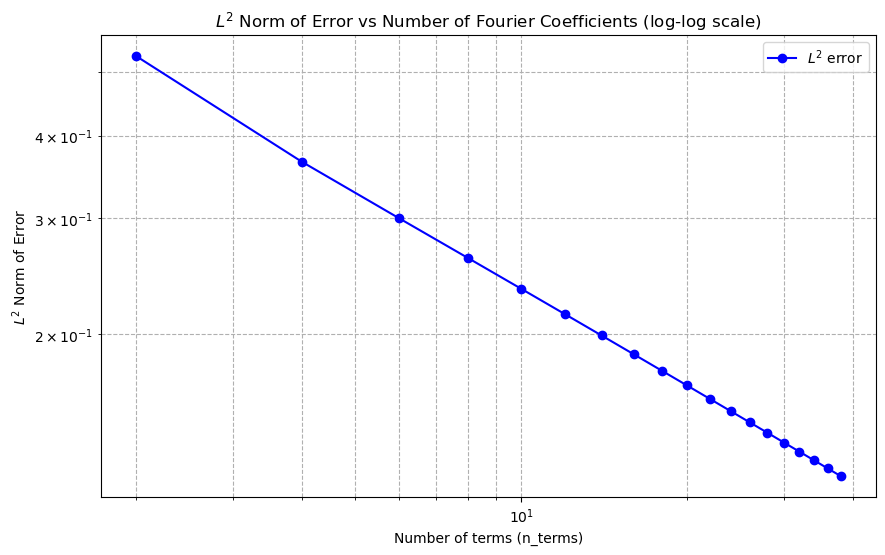

In [66]:
# # Compute L2 error for each n_terms

# for N in Ns:
#     c_k = compute_fourier_coefficients_complex(f, L, N)
#     partial_sum_fn = partial_sum_fourier(c_k, L)
#     L2_error = compute_L2_error(f, partial_sum_fn, L)
#     L2_errors.append(L2_error)

# Perform linear regression on log-log data
log_n_terms = np.log(Ns)
log_L2_errors = np.log(L2_errors)

# Linear regression to find slope (convergence rate)
slope, intercept, r_value, p_value, std_err = linregress(log_n_terms, log_L2_errors)

# Plot the L2 error against n_terms on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(Ns, L2_errors, marker='o', color='blue', label='$L^2$ error')
plt.title('$L^2$ Norm of Error vs Number of Fourier Coefficients (log-log scale)')
plt.xlabel('Number of terms (n_terms)')
plt.ylabel('$L^2$ Norm of Error')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


In [67]:
slope

-0.4918701045949209